# House Sales in King Country, USA

<hr>

### About Dataset
> This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

### Data Source
This dataset can be found in Kaggle - <a href='https://www.kaggle.com/harlfoxem/housesalesprediction'>Source</a>

<hr>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

%matplotlib inline

df = pd.read_csv('kc_house_data.csv')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
df.drop(['id'], axis='columns', inplace=True)

<hr>

## Removing Outliers

In [4]:
ol_df = df.loc[:, (df.dtypes == np.float64) | (df.dtypes == np.int64)] 
ol_df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

In [5]:
# Z-score
z = np.abs(stats.zscore(ol_df))
threshold = 3
print(np.where(z > 3))

(array([    1,     5,     5, ..., 21590, 21590, 21600]), array([13,  2,  3, ..., 11, 17, 10]))


In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price            323050.000
bedrooms              1.000
bathrooms             0.750
sqft_living        1123.000
sqft_lot           5648.000
floors                1.000
waterfront            0.000
view                  0.000
condition             1.000
grade                 1.000
sqft_above         1020.000
sqft_basement       560.000
yr_built             46.000
yr_renovated          0.000
zipcode              85.000
lat                   0.207
long                  0.203
sqft_living15       870.000
sqft_lot15         4983.000
dtype: float64


In [7]:
ol_df = ol_df[(z < 3).all(axis=1)]

In [8]:
ol_df = ol_df[~((ol_df < (Q1 - 1.5 * IQR)) |(ol_df > (Q3 + 1.5 * IQR))).any(axis=1)]
ol_df.shape  # Filtering out outliers

(14929, 19)

In [9]:
idx = ol_df.index
df = df.loc[idx]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14929 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           14929 non-null  object 
 1   price          14929 non-null  float64
 2   bedrooms       14929 non-null  int64  
 3   bathrooms      14929 non-null  float64
 4   sqft_living    14929 non-null  int64  
 5   sqft_lot       14929 non-null  int64  
 6   floors         14929 non-null  float64
 7   waterfront     14929 non-null  int64  
 8   view           14929 non-null  int64  
 9   condition      14929 non-null  int64  
 10  grade          14929 non-null  int64  
 11  sqft_above     14929 non-null  int64  
 12  sqft_basement  14929 non-null  int64  
 13  yr_built       14929 non-null  int64  
 14  yr_renovated   14929 non-null  int64  
 15  zipcode        14929 non-null  int64  
 16  lat            14929 non-null  float64
 17  long           14929 non-null  float64
 18  sqft_l

<hr>

#### date

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [12]:
df.date.min()

Timestamp('2014-05-02 00:00:00')

In [13]:
df.date.max()

Timestamp('2015-05-24 00:00:00')

In [14]:
date_and_price_df = df[['date', 'price']]
date_and_price_df.sort_values(by=['date'])

date     price
8326  2014-05-02  615000.0
16880 2014-05-02  407500.0
1041  2014-05-02  550000.0
18690 2014-05-02  470000.0
8300  2014-05-02  285000.0
...          ...       ...
20472 2015-05-14  479349.0
15811 2015-05-14  440000.0
928   2015-05-14  359000.0
5637  2015-05-15  450000.0
13053 2015-05-24  445500.0

[14929 rows x 2 columns]

In [15]:
group = date_and_price_df.groupby(['date'])['price'].mean()

In [16]:
avg_price_of_the_day = [avg_price for avg_price in group]
avg_price_of_the_day

[447844.54545454547,
 589000.0,
 589333.3333333334,
 489819.6379310345,
 427781.73076923075,
 427788.68852459016,
 453811.8181818182,
 383216.4130434783,
 326650.0,
 605250.0,
 491219.64814814815,
 492678.50793650793,
 462316.6724137931,
 393804.5263157895,
 439560.85714285716,
 410000.0,
 462038.0,
 428654.0847457627,
 430563.4358974359,
 404680.3214285714,
 408229.3220338983,
 456220.5306122449,
 386885.71428571426,
 281766.6666666667,
 372408.3333333333,
 443122.8783783784,
 440528.2957746479,
 446341.0612244898,
 448482.7368421053,
 544767.6,
 515166.6666666667,
 514850.0,
 471792.05479452055,
 450024.10447761195,
 445244.9117647059,
 500582.5416666667,
 506833.3333333333,
 498882.85714285716,
 442627.328125,
 452664.04225352115,
 428539.037037037,
 465717.22222222225,
 445340.0961538461,
 455850.4,
 502491.6666666667,
 468659.59420289856,
 432121.35,
 436215.56944444444,
 451117.13636363635,
 468876.8615384615,
 525080.0,
 584511.1111111111,
 408214.81720430107,
 440427.2307692307

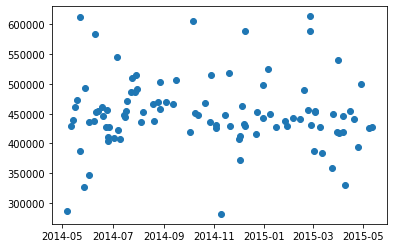

In [17]:
plt.plot_date(date_and_price_df.date.unique()[:100], avg_price_of_the_day[:100])

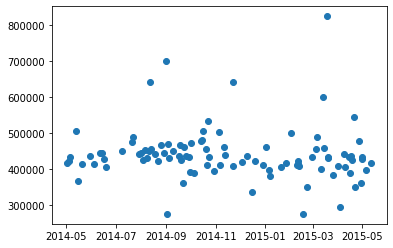

In [18]:
plt.plot_date(date_and_price_df.date.unique()[101:200], avg_price_of_the_day[101:200])

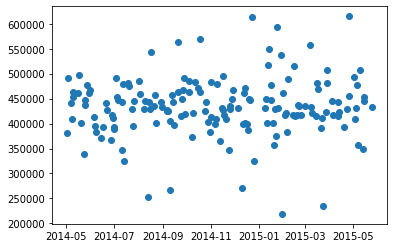

In [19]:
plt.plot_date(date_and_price_df.date.unique()[201:1000], avg_price_of_the_day[201:1000])

In [20]:
df.drop(['date'], axis='columns', inplace=True)

<hr>

In [21]:
from sklearn.preprocessing import MinMaxScaler

df.price = MinMaxScaler().fit_transform(df.price.values.reshape(-1, 1))

#### Bedrooms

Pearson Coefficient: 0.24005222979421834
P-value: 0.0000000000000000


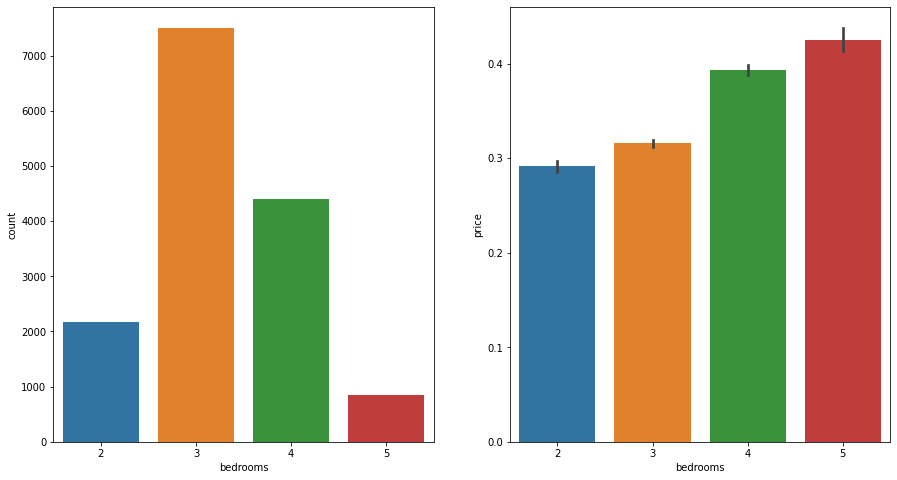

In [22]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

sns.countplot(x='bedrooms', data=df, ax=ax1)
sns.barplot(x='bedrooms', y='price', data=df, ax=ax2)

pearson_coef, p_value = stats.pearsonr(df['bedrooms'], df['price'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

replacement = {
    2: 0,
    3: 1,
    4: 2,
    5: 3
}
df.bedrooms = df.bedrooms.apply(lambda x: replacement[x])

#### Bathrooms

Pearson Coefficient: 0.3405142668738289
P-value: 0.0000000000000000


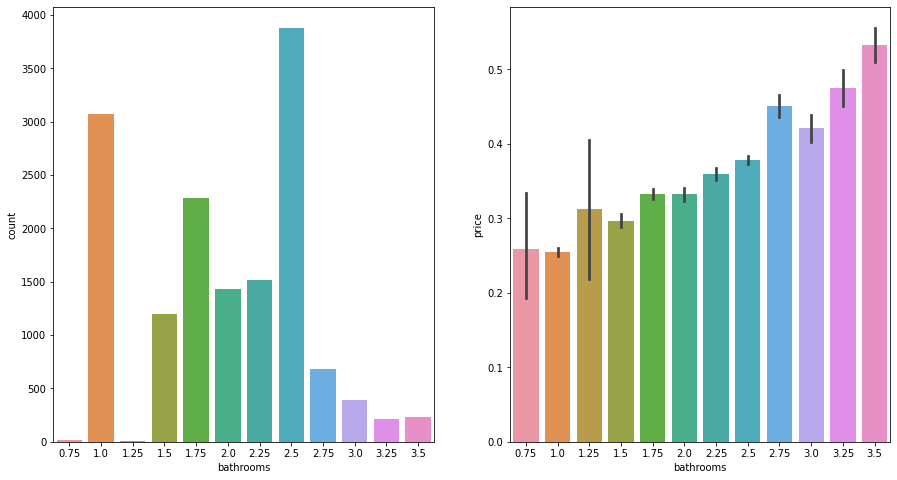

In [23]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

sns.countplot(x='bathrooms', data=df, ax=ax1)
sns.barplot(x='bathrooms', y='price', data=df, ax=ax2)

pearson_coef, p_value = stats.pearsonr(df['bathrooms'], df['price'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

replacement = {
    1.0: 0,
    0.75: 1,
    1.5: 2,
    1.25: 3,
    2.0: 4,
    1.75: 4,
    2.25: 5,
    2.5: 6,
    3.0: 7,
    2.75: 8,
    3.25: 9,
    3.5: 10
}
df.bathrooms = df.bathrooms.apply(lambda x: replacement[x])

#### sqfl_living | sqft_lot

Pearson Coefficient: 0.5146234918281558
P-value: 0.0000000000000000
Pearson Coefficient: -0.08548506930745263
P-value: 0.0000000000000000


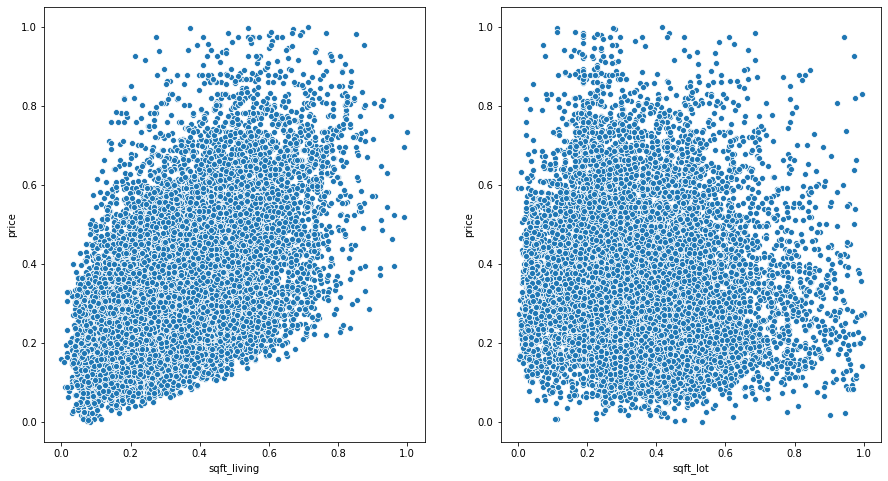

In [24]:
df.sqft_living = MinMaxScaler().fit_transform(df.sqft_living.values.reshape(-1, 1))
df.sqft_lot = MinMaxScaler().fit_transform(df.sqft_lot.values.reshape(-1, 1))

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

sns.scatterplot(x='sqft_living', y='price', data=df, ax=ax1)
sns.scatterplot(x='sqft_lot', y='price', data=df, ax=ax2)

pearson_coef, p_value = stats.pearsonr(df['sqft_living'], df['price'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

pearson_coef, p_value = stats.pearsonr(df['sqft_lot'], df['price'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

df.drop(['sqft_lot'], axis='columns', inplace=True)

#### floors | waterfront | view | condition | grade

floors
Pearson Coefficient: 0.22774645987630893
P-value: 0.0000000000000000

waterfront
Pearson Coefficient: nan
P-value: nan

view
Pearson Coefficient: nan
P-value: nan

condition
Pearson Coefficient: 0.08526474329089676
P-value: 0.0000000000000000

grade
Pearson Coefficient: 0.5275210187108342
P-value: 0.0000000000000000



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


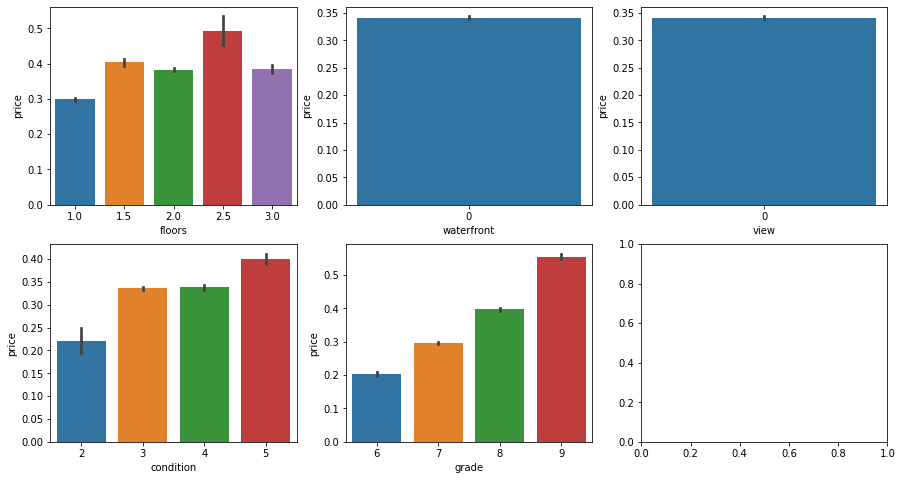

In [25]:
f, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

sns.barplot(x='floors', y='price', data=df, ax=ax[0, 0])
sns.barplot(x='waterfront', y='price', data=df, ax=ax[0, 1])
sns.barplot(x='view', y='price', data=df, ax=ax[0, 2])
sns.barplot(x='condition', y='price', data=df, ax=ax[1, 0])
sns.barplot(x='grade', y='price', data=df, ax=ax[1, 1])

pearson_coef, p_value = stats.pearsonr(df['floors'], df['price'])
print('floors')
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))
print()

pearson_coef, p_value = stats.pearsonr(df['waterfront'], df['price'])
print('waterfront')
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))
print()

pearson_coef, p_value = stats.pearsonr(df['view'], df['price'])
print('view')
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))
print()

pearson_coef, p_value = stats.pearsonr(df['condition'], df['price'])
print('condition')
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))
print()

pearson_coef, p_value = stats.pearsonr(df['grade'], df['price'])
print('grade')
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))
print()

In [26]:
df.view.unique()
df.drop(['view'], axis='columns', inplace=True)

In [27]:
df.waterfront.unique()
df.drop(['waterfront'], axis='columns', inplace=True)

In [28]:
# For floors
replacement = {
    1.0: 0,
    2.0: 1,
    3.0: 2,
    1.5: 3,
    2.5: 4
}
df.floors = df.floors.apply(lambda x: replacement[x])

# condition
replacement = {
    2: 0,
    3: 1,
    4: 1,
    5: 2
}
df.condition = df.condition.apply(lambda x: replacement[x])

# grade
replacement = {
    6: 0,
    7: 1,
    8: 2,
    9: 3
}
df.grade = df.grade.apply(lambda x: replacement[x])

#### sqft_above | sqft_basement

Pearson Coefficient: 0.4083465951035522
P-value: 0.0000000000000000
Pearson Coefficient: 0.20011147048578992
P-value: 0.0000000000000000


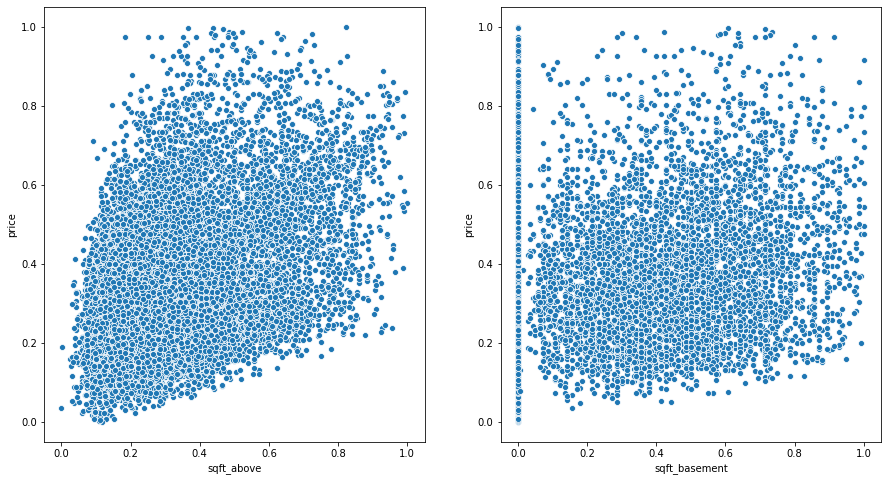

In [29]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

df.sqft_above = MinMaxScaler().fit_transform(df.sqft_above.values.reshape(-1, 1))
df.sqft_basement = MinMaxScaler().fit_transform(df.sqft_basement.values.reshape(-1, 1))

sns.scatterplot(x='sqft_above', y='price', data=df, ax=ax1)
sns.scatterplot(x='sqft_basement', y='price', data=df, ax=ax2)

pearson_coef, p_value = stats.pearsonr(df['sqft_above'], df['price'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

pearson_coef, p_value = stats.pearsonr(df['sqft_basement'], df['price'])
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))

#### yr_built

(array([1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 <a list of 9 Text major ticklabel objects>)

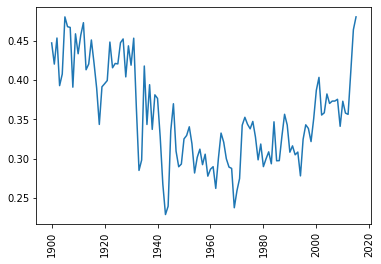

In [30]:
tmp_df = df[['yr_built', 'price']].sort_values(by=['yr_built'])

group = tmp_df.groupby(['yr_built'])['price'].mean()
avg_price_of_the_year = [avg_price for avg_price in group]

plt.plot(tmp_df.yr_built.unique(), avg_price_of_the_year, linestyle='solid')
plt.xticks(rotation=90)

In [31]:
df[df['price'] == tmp_df['price'].min()]

price  bedrooms  bathrooms  sqft_living  floors  condition  grade  \
8274    0.0         1          0     0.082418       0          1      0   

      sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
8274    0.116564            0.0      1954             0    98146  47.4987   

         long  sqft_living15  sqft_lot15  
8274 -122.341           1140       11250

#### yr_renovated

In [32]:
print(df.yr_renovated.unique())
df.drop(['yr_renovated'], axis='columns', inplace=True)

[0]


#### zipcode

zipcode
Pearson Coefficient: -0.007987502261875253
P-value: 0.3291233811872668



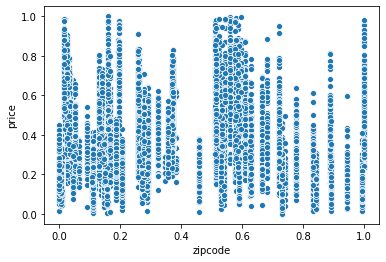

In [33]:
df.zipcode = MinMaxScaler().fit_transform(df.zipcode.values.reshape(-1, 1))

sns.scatterplot(x='zipcode', y='price', data=df)

pearson_coef, p_value = stats.pearsonr(df['zipcode'], df['price'])
print('zipcode')
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))
print()

df.drop(['zipcode'], axis='columns', inplace=True)

#### lat | long

lat
Pearson Coefficient: 0.4907177749536157
P-value: 0.0000000000000000

long
Pearson Coefficient: 0.04915192266822847
P-value: 0.0000000018699204

lat
Pearson Coefficient: -0.16176287827522828
P-value: 0.0000000000000000



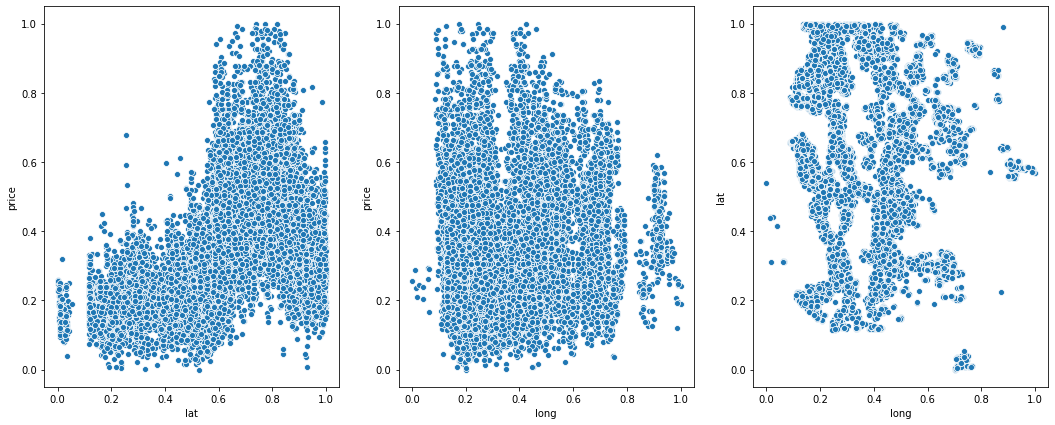

In [34]:
df.lat = MinMaxScaler().fit_transform(df.lat.values.reshape(-1, 1))
df.long = MinMaxScaler().fit_transform(df.long.values.reshape(-1, 1))

f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 7))

sns.scatterplot(x='lat', y='price', data=df, ax=ax1)
sns.scatterplot(x='long', y='price', data=df, ax=ax2)
sns.scatterplot(x='long', y='lat', data=df, ax=ax3)

pearson_coef, p_value = stats.pearsonr(df['lat'], df['price'])
print('lat')
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))
print()

pearson_coef, p_value = stats.pearsonr(df['long'], df['price'])
print('long')
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))
print()

pearson_coef, p_value = stats.pearsonr(df['long'], df['lat'])
print('lat')
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))
print()

#### sqft_living15 | sqft_lot15

sqft_living15
Pearson Coefficient: 0.4479556497090307
P-value: 0.0000000000000000

sqft_lot15
Pearson Coefficient: -0.09562642539037479
P-value: 0.0000000000000000

sqft_lot15
Pearson Coefficient: 0.21457580318551173
P-value: 0.0000000000000000



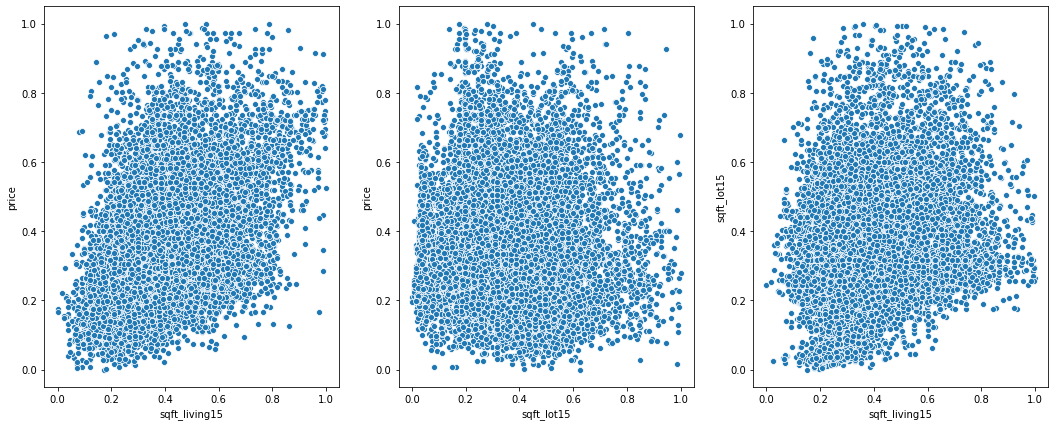

In [35]:
df.sqft_living15 = MinMaxScaler().fit_transform(df.sqft_living15.values.reshape(-1, 1))
df.sqft_lot15 = MinMaxScaler().fit_transform(df.sqft_lot15.values.reshape(-1, 1))

f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 7))

sns.scatterplot(x='sqft_living15', y='price', data=df, ax=ax1)
sns.scatterplot(x='sqft_lot15', y='price', data=df, ax=ax2)
sns.scatterplot(x='sqft_living15', y='sqft_lot15', data=df, ax=ax3)

pearson_coef, p_value = stats.pearsonr(df['sqft_living15'], df['price'])
print('sqft_living15')
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))
print()

pearson_coef, p_value = stats.pearsonr(df['sqft_lot15'], df['price'])
print('sqft_lot15')
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))
print()

pearson_coef, p_value = stats.pearsonr(df['sqft_living15'], df['sqft_lot15'])
print('sqft_lot15')
print(f'Pearson Coefficient: {pearson_coef}')
print('P-value: {:.16f}'.format(float(p_value)))
print()

df.drop(['sqft_lot15'], axis='columns', inplace=True)

In [36]:
yr_built_df = df[['yr_built']]

In [37]:
df.drop(['yr_built'], axis='columns', inplace=True)

<hr>

#### Shuffling the dataframe

In [38]:
df = df.sample(frac=1)
df.head()

price  bedrooms  bathrooms  sqft_living  floors  condition  grade  \
17158  0.289952         1          5     0.315934       0          1      1   
616    0.423923         1          5     0.255495       1          1      1   
9515   0.699043         2          8     0.618132       0          1      3   
17516  0.754067         2          6     0.574176       1          1      3   
1358   0.191388         2          0     0.175824       3          1      1   

       sqft_above  sqft_basement       lat      long  sqft_living15  
17158    0.223926       0.357143  0.982826  0.314900       0.390728  
616      0.309816       0.000000  0.841524  0.551459       0.221854  
9515     0.407975       0.714286  0.634416  0.496160       0.692053  
17516    0.665644       0.000000  0.612311  0.509985       0.748344  
1358     0.220859       0.000000  0.958000  0.254992       0.241722

In [39]:
columns = df.columns.tolist()
columns.remove('price')
columns

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'lat',
 'long',
 'sqft_living15']

In [40]:
X = df[columns]
y = df['price']

<hr>

## Creating the model

#### Splitting the dataset

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

In [42]:
kf = KFold(n_splits=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

#### Cross Validation

In [43]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [44]:
score = cross_val_score(Ridge(), X_train, y_train, cv=kf)
print(score.mean())

pr = PolynomialFeatures(degree=4)
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)

score = cross_val_score(Ridge(), X_train_pr, y_train, cv=kf)
print(score.mean())

0.5975593089029678
0.7610115755127875


#### Fitting the model

In [45]:
import xgboost

In [46]:
xgb = xgboost.XGBRegressor()
try:
    xgb.fit(X_train_pr, y_train)
except KeyError:
    pass

#### Predictions

In [47]:
xgb_y_test_pred = xgb.predict(X_test_pr)

#### Evaluation

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
rms_error = mean_squared_error(y_test, xgb_y_test_pred, squared=False)
r2_score_value = r2_score(y_test, xgb_y_test_pred)

print(f"Root mean squared error: {rms_error}")
print(f"R2-score: {r2_score_value}")

Root mean squared error: 0.06827333594242828
R2-score: 0.8494199177191388


#### Pipeline

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [51]:
scaling = ('scale', StandardScaler())
ploy = ('ploy', PolynomialFeatures(degree=4))
model = ('model', xgboost.XGBRegressor())

# Steps in the pipeline
steps = [scaling, ploy, model]

pipe = Pipeline(steps=steps)

# Fiitting the model
model = pipe.fit(X_train, y_train)

# Out-Of-Sample Forecast
y_test_pred = model.predict(X_test)

# Evaluation
rms_error = mean_squared_error(y_test, y_test_pred, squared=False)
r2_score_value = r2_score(y_test, y_test_pred)

print(f"Root mean squared error: {rms_error}")
print(f"R2-score: {r2_score_value}")

Root mean squared error: 0.06863625028283767
R2-score: 0.847814813374888


#### Saving the model

In [52]:
from joblib import dump

dump(model, 'model.joblib')

['model.joblib']

<hr>

### Visualizing our prediction against actual values

In [53]:
# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

#### Visualizing entire prediction vs actual value

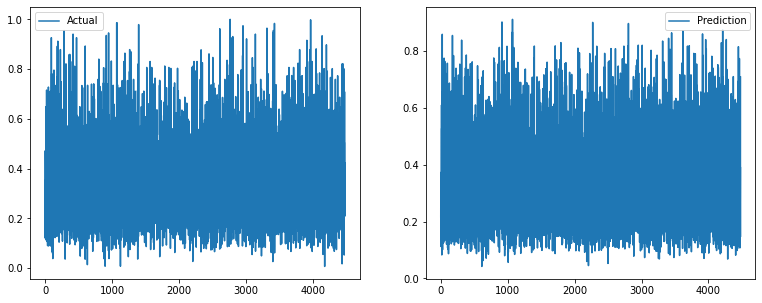

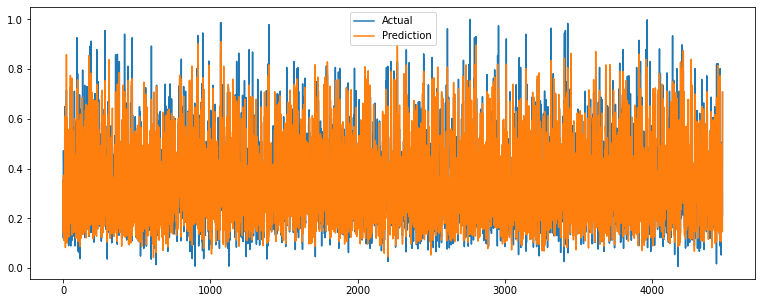

In [54]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

ax1.plot(np.arange(len(y_test)), y_test, label='Actual')
ax2.plot(np.arange(len(y_test_pred)), y_test_pred, label='Prediction')

ax1.legend()
ax2.legend()

f, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(13, 5))

ax3.plot(np.arange(len(y_test)), y_test, label='Actual')
ax3.plot(np.arange(len(y_test_pred)), y_test_pred, label='Prediction')

ax3.legend()

#### Visualizing prediction vs actual values in interval of 100

In [55]:
def plot_result(start, end):
    f, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(13, 5))

    ax3.plot(np.arange(len(y_test[start:end+1])), y_test[start:end+1], label='Actual')
    ax3.plot(np.arange(len(y_test_pred[start:end+1])), y_test_pred[start:end+1], label='Prediction')

    ax3.set_title(f'{start} - {end}')
    ax3.legend()

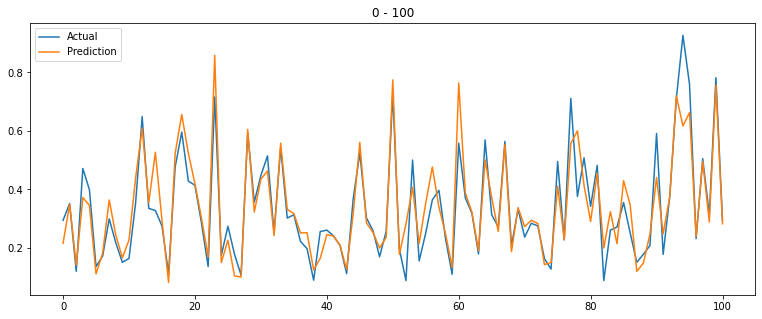

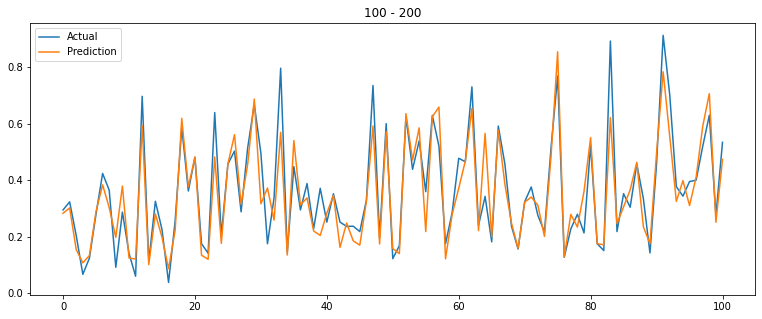

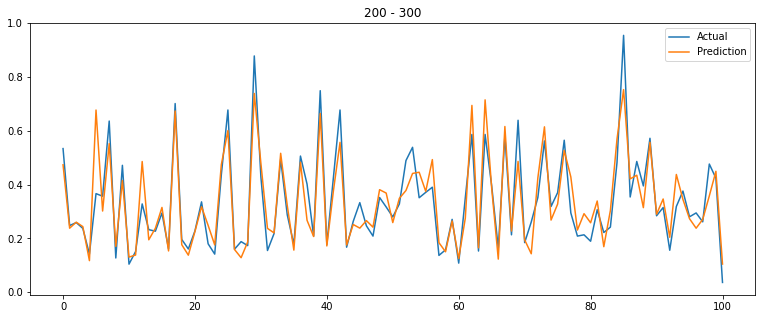

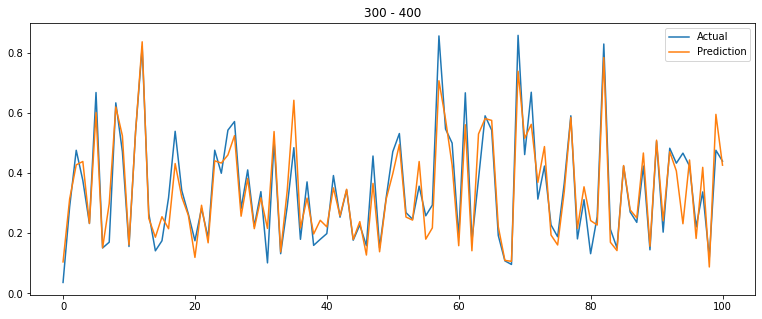

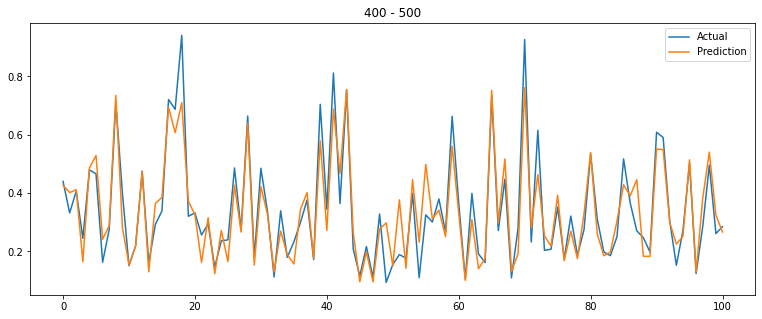

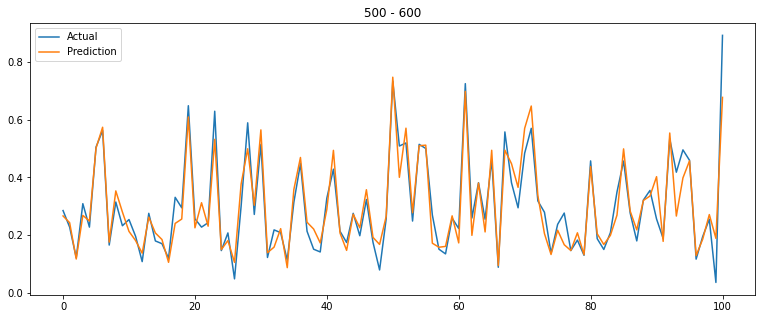

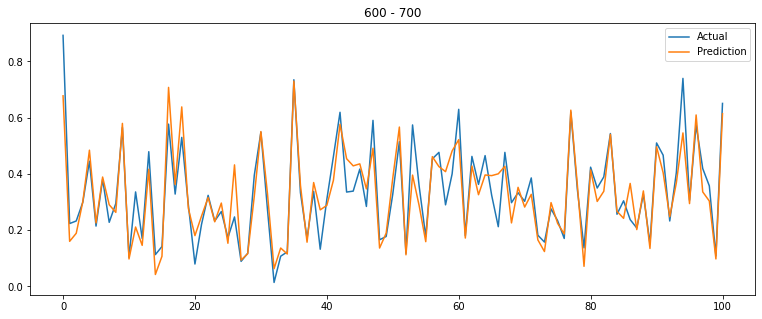

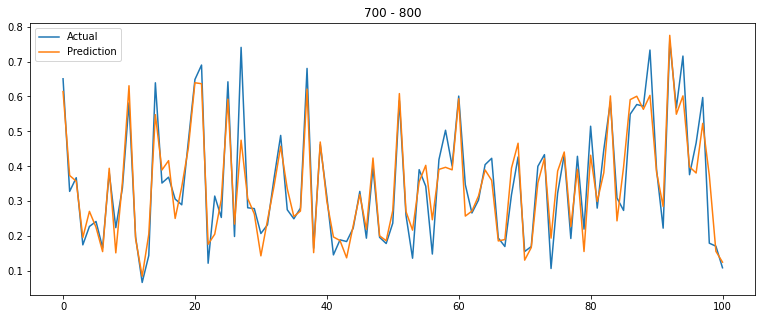

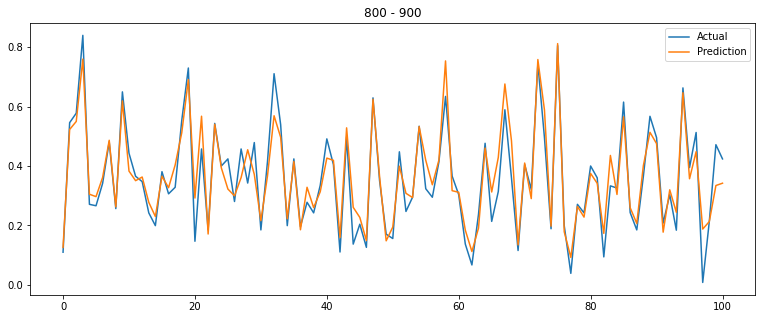

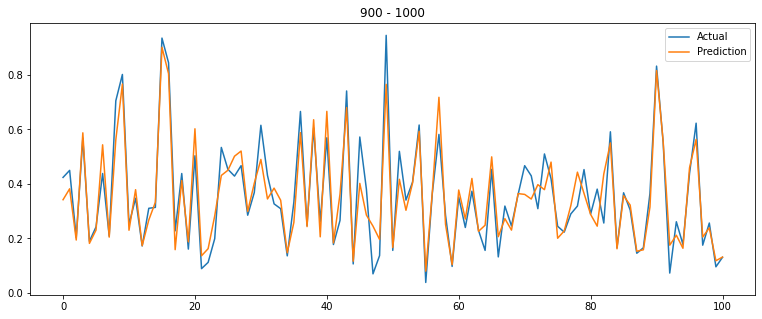

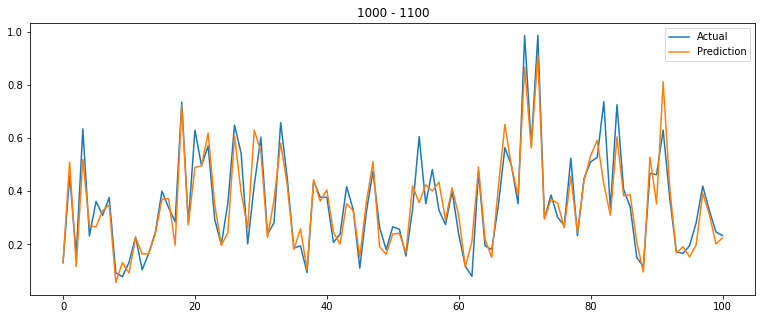

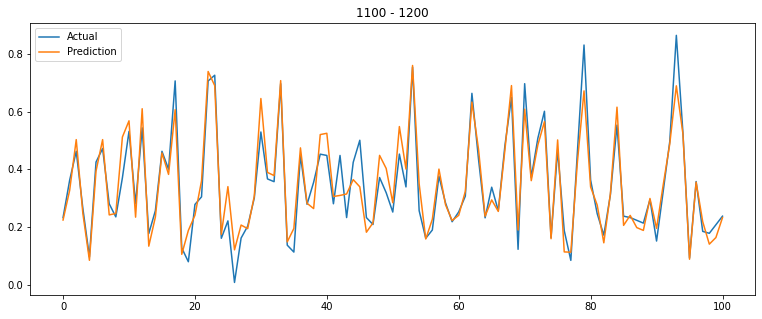

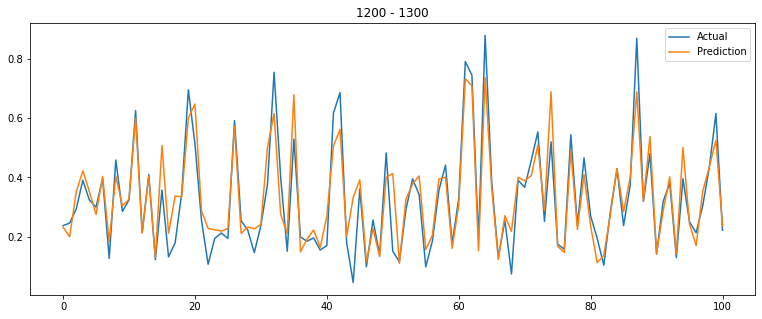

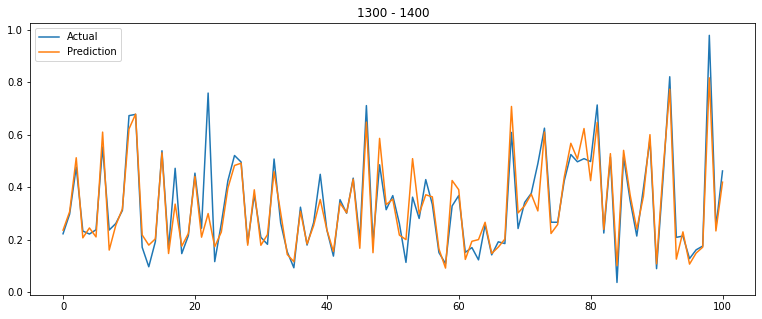

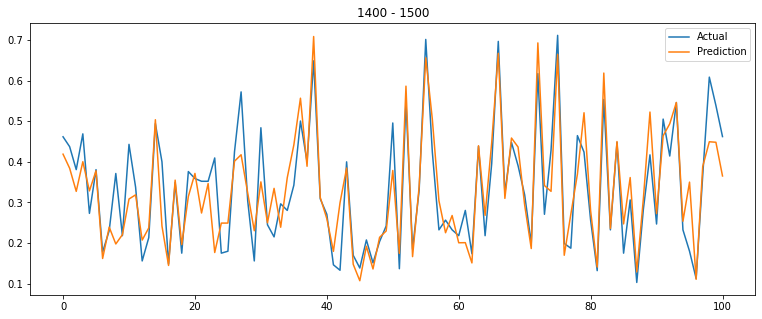

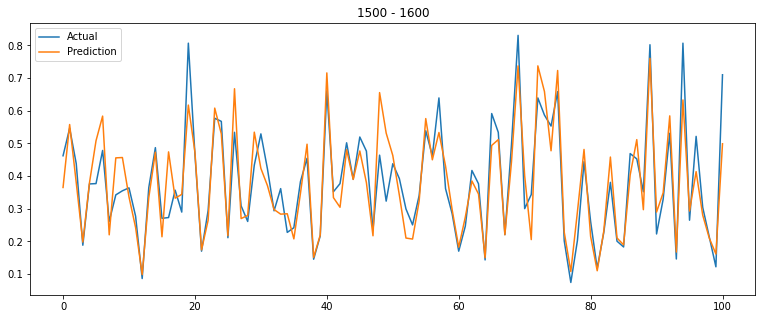

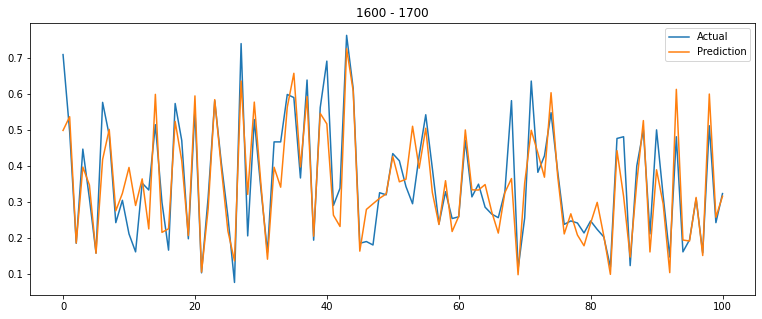

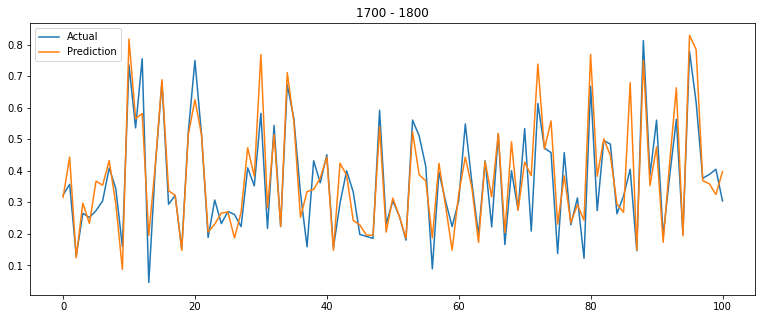

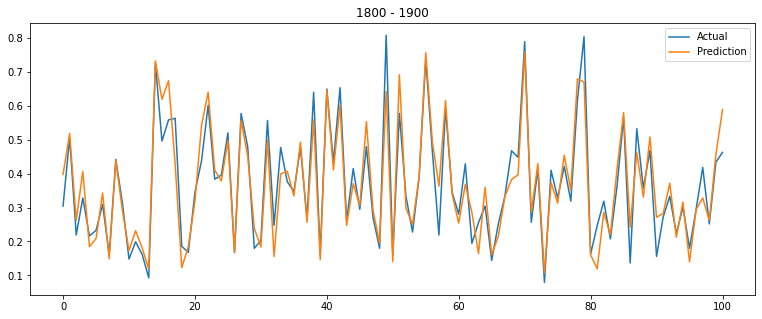

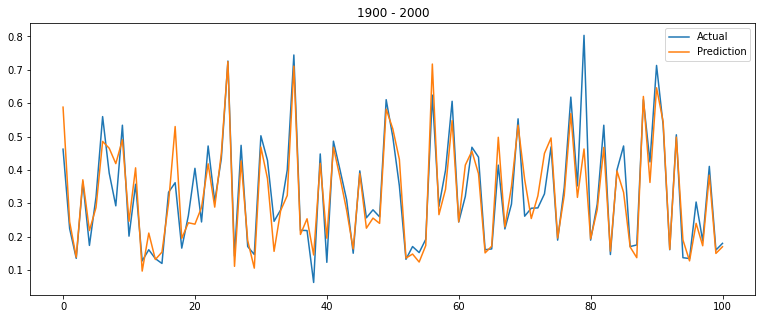

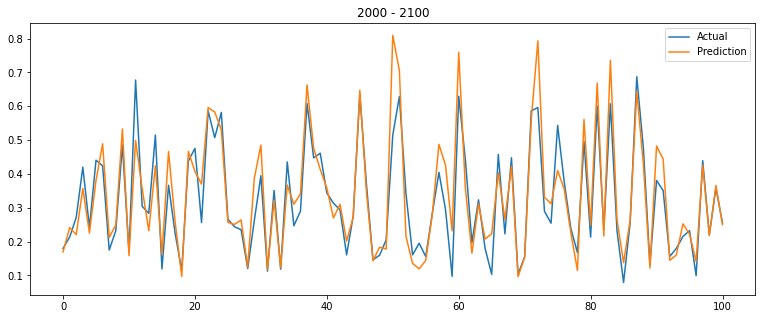

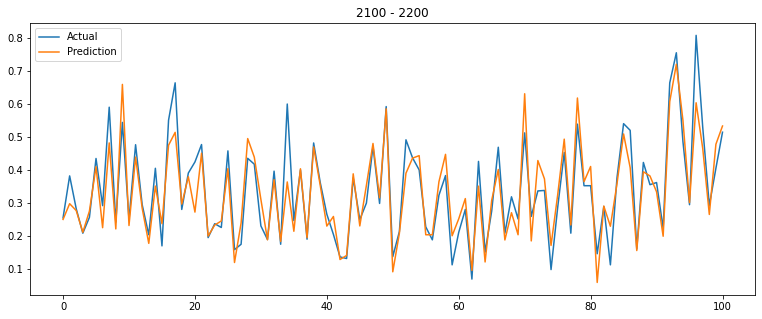

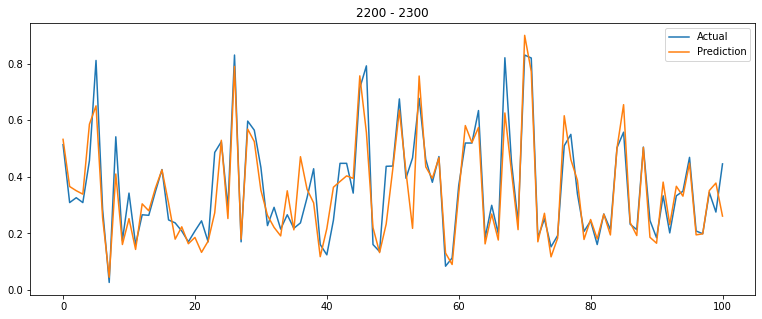

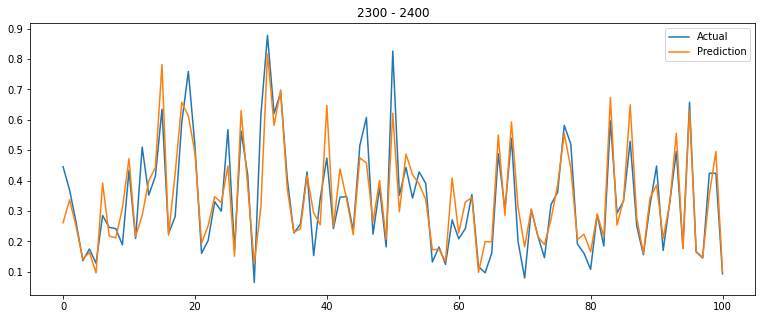

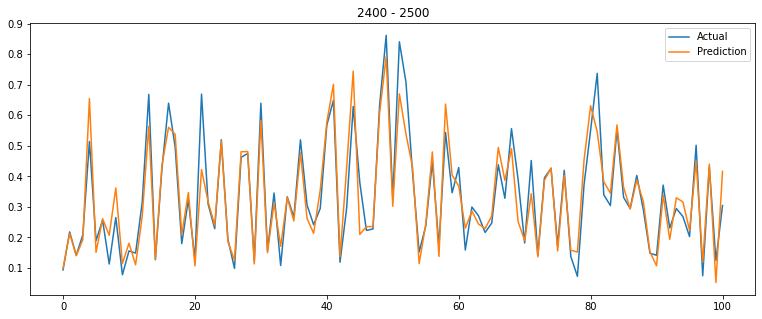

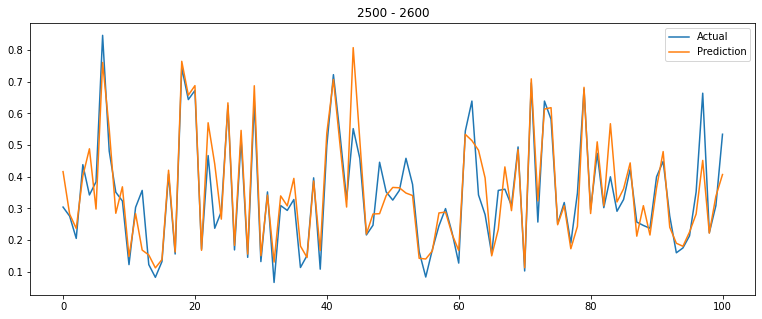

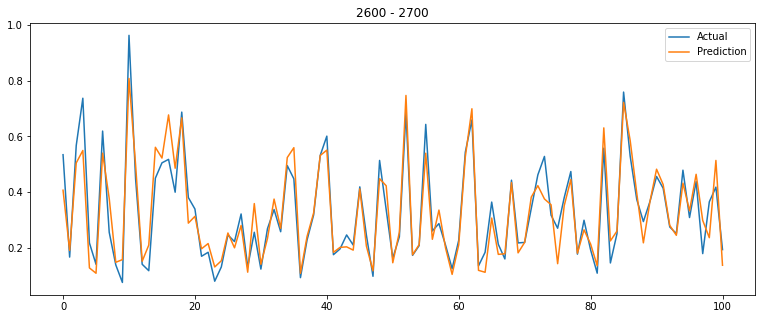

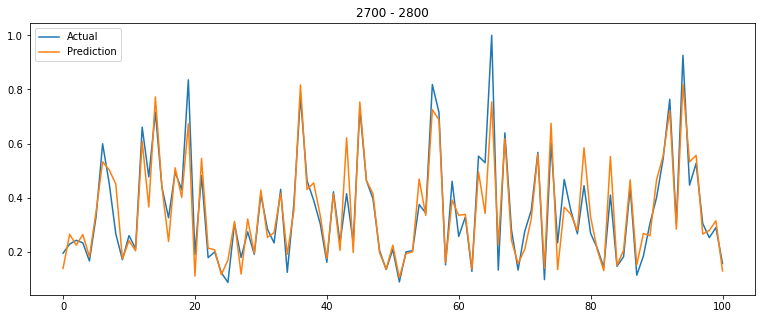

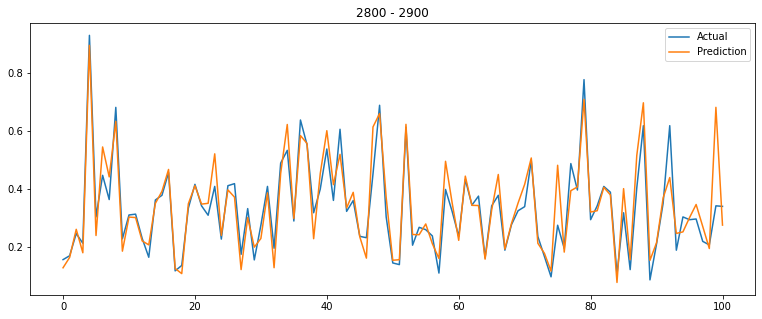

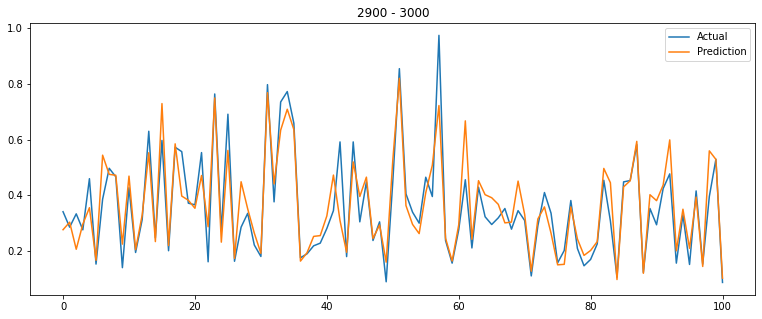

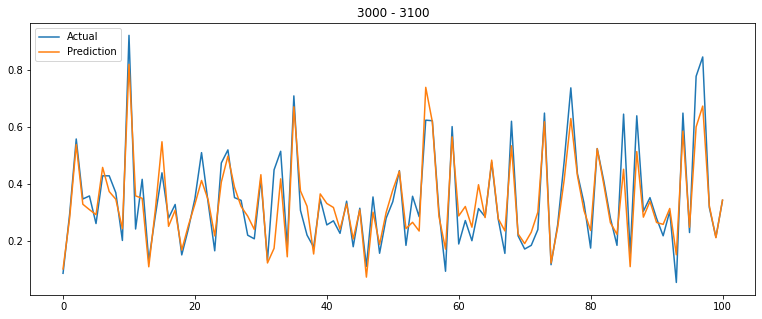

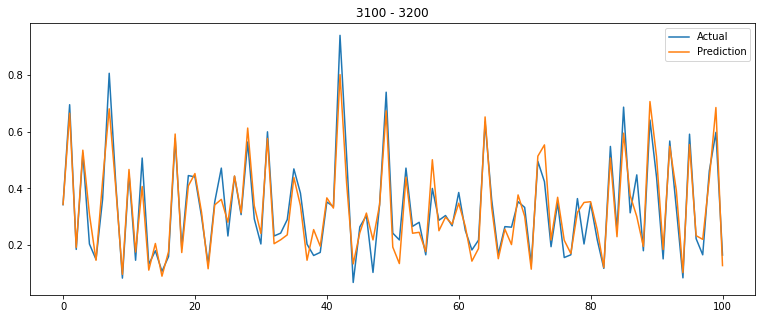

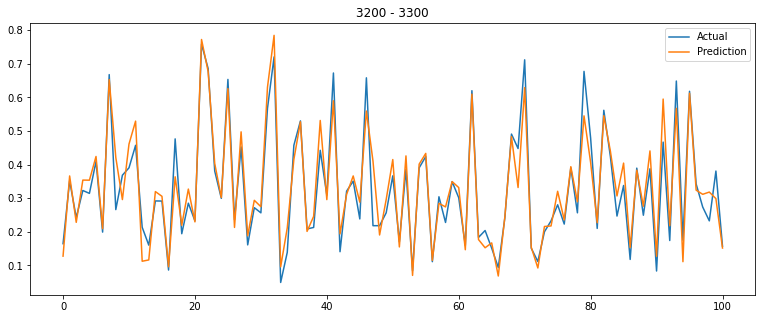

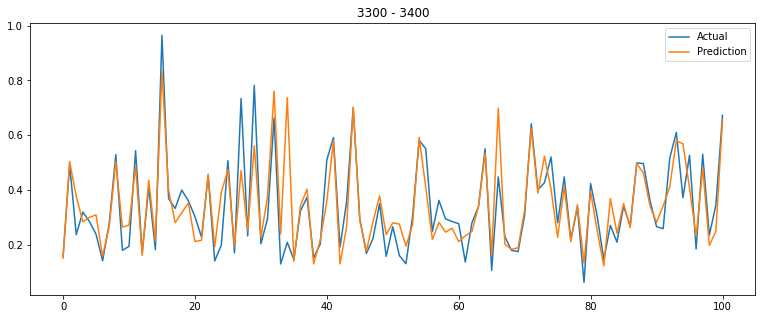

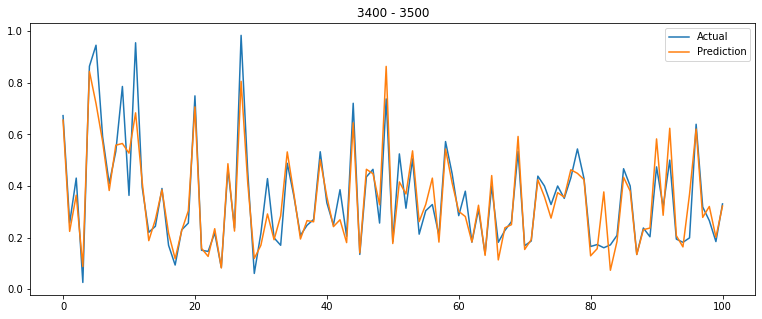

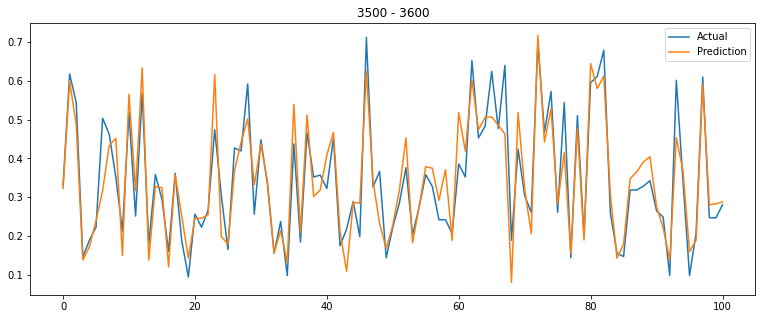

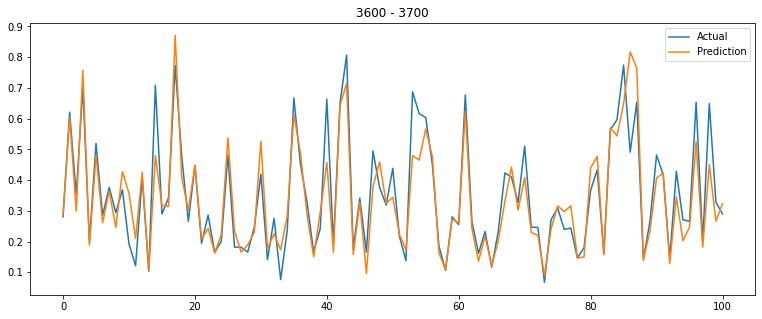

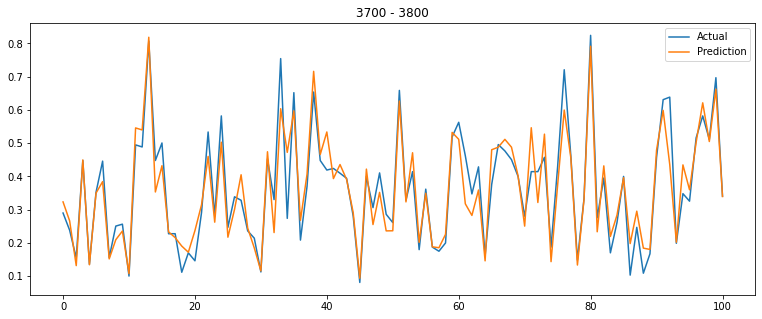

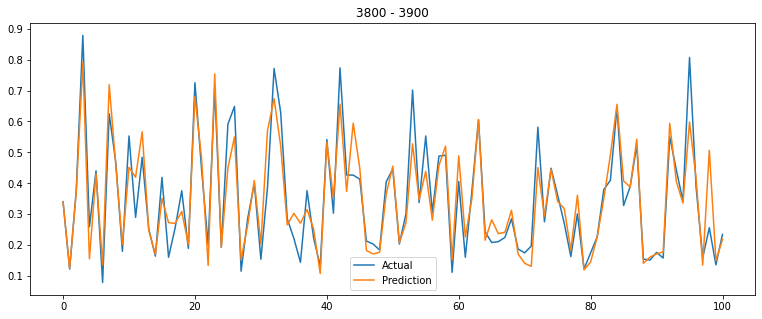

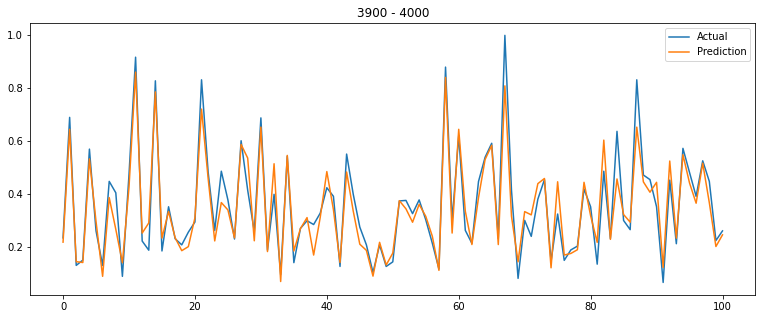

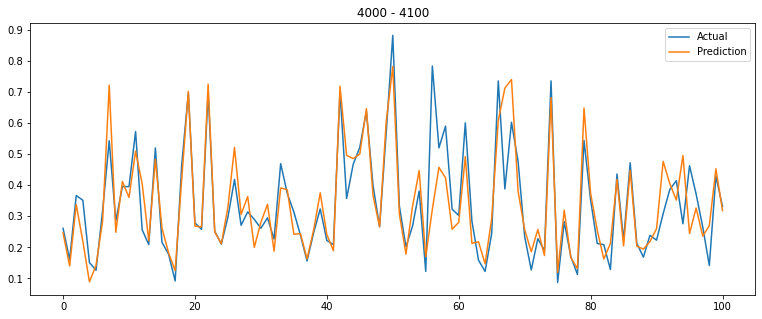

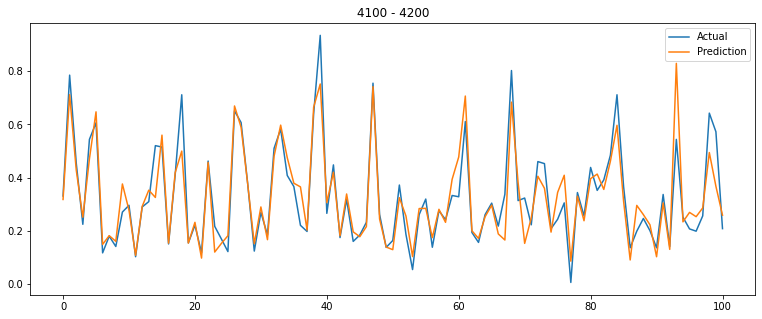

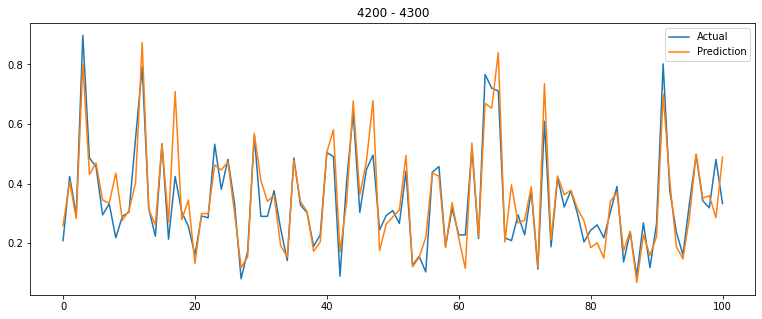

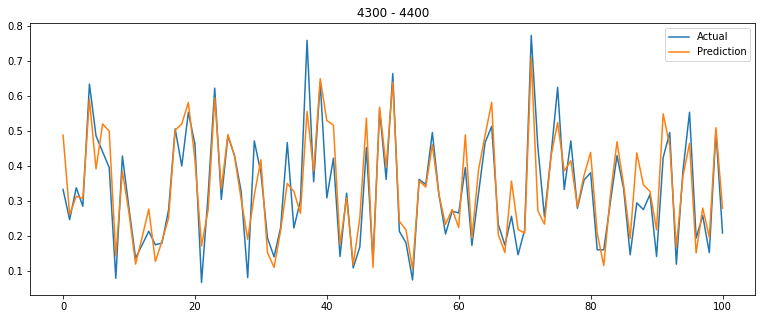

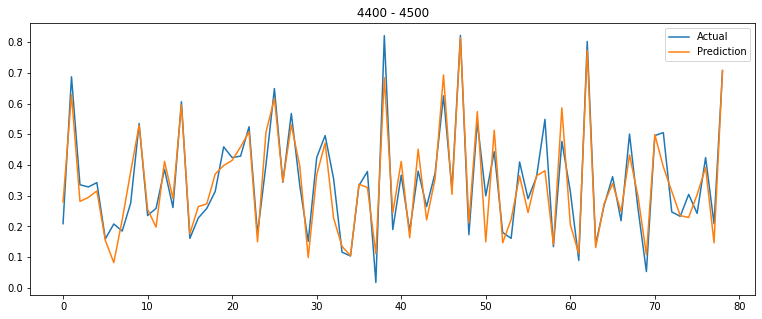

In [56]:
for i in range(0, 4480, 100):
    start = i
    end = start + 100
    plot_result(start, end)

<hr>